In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv("/kaggle/input/ctr-in-advertisement/Ad_click_prediction_train (1).csv")

In [4]:
df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [5]:
df.shape

(463291, 15)

In [6]:
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
column type,int64,object,int64,object,int64,int64,int64,float64,float64,object,float64,float64,float64,int64,int64
null values (nb),0,0,0,0,0,0,0,365854,18243,18243,18243,18243,125129,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.96851,3.937698,3.937698,3.937698,3.937698,27.008727,0.0,0.0


In [7]:
df.drop(labels='product_category_2', axis=1, inplace=True)

In [8]:
sum(df['is_click'] == 1)

31331

In [9]:

num_missing = df['city_development_index'].isnull().sum()
if num_missing > 0:
    missing_indices = df['city_development_index'].isnull()
    num_missing_values = num_missing
    replace_values = np.random.choice([1, 2, 3,4], size=num_missing_values, p=[0.25, 0.25,0.25,0.25])
    df['city_development_index'][missing_indices] = replace_values

In [10]:
df.isna().sum()

session_id                    0
DateTime                      0
user_id                       0
product                       0
campaign_id                   0
webpage_id                    0
product_category_1            0
user_group_id             18243
gender                    18243
age_level                 18243
user_depth                18243
city_development_index        0
var_1                         0
is_click                      0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.isna().sum()

session_id                0
DateTime                  0
user_id                   0
product                   0
campaign_id               0
webpage_id                0
product_category_1        0
user_group_id             0
gender                    0
age_level                 0
user_depth                0
city_development_index    0
var_1                     0
is_click                  0
dtype: int64

In [13]:
sum(df['is_click'] == 1)

30057

In [14]:
df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,8.0,Female,2.0,2.0,2.0,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,8.0,Female,2.0,2.0,4.0,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,2.0,Male,2.0,3.0,2.0,1,0


In [15]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['gender'] = LE.fit_transform(df['gender'])
df['product'] = LE.fit_transform(df['product'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445048 entries, 0 to 463290
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              445048 non-null  int64  
 1   DateTime                445048 non-null  object 
 2   user_id                 445048 non-null  int64  
 3   product                 445048 non-null  int64  
 4   campaign_id             445048 non-null  int64  
 5   webpage_id              445048 non-null  int64  
 6   product_category_1      445048 non-null  int64  
 7   user_group_id           445048 non-null  float64
 8   gender                  445048 non-null  int64  
 9   age_level               445048 non-null  float64
 10  user_depth              445048 non-null  float64
 11  city_development_index  445048 non-null  float64
 12  var_1                   445048 non-null  int64  
 13  is_click                445048 non-null  int64  
dtypes: float64(4), int64

In [17]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['DateTime'] = df['DateTime'].dt.hour

In [18]:
df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,0,858557,2,359520,13787,4,10.0,0,4.0,3.0,3.0,0,0
1,333291,0,243253,2,105960,11085,5,8.0,0,2.0,2.0,2.0,0,0
2,129781,0,243253,2,359520,13787,4,8.0,0,2.0,2.0,4.0,0,0
3,464848,0,1097446,8,359520,13787,3,3.0,1,3.0,3.0,2.0,1,0
4,90569,0,663656,2,405490,60305,3,2.0,1,2.0,3.0,2.0,1,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445048 entries, 0 to 463290
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              445048 non-null  int64  
 1   DateTime                445048 non-null  int64  
 2   user_id                 445048 non-null  int64  
 3   product                 445048 non-null  int64  
 4   campaign_id             445048 non-null  int64  
 5   webpage_id              445048 non-null  int64  
 6   product_category_1      445048 non-null  int64  
 7   user_group_id           445048 non-null  float64
 8   gender                  445048 non-null  int64  
 9   age_level               445048 non-null  float64
 10  user_depth              445048 non-null  float64
 11  city_development_index  445048 non-null  float64
 12  var_1                   445048 non-null  int64  
 13  is_click                445048 non-null  int64  
dtypes: float64(4), int64

In [20]:
df.nunique()

session_id                445048
DateTime                      24
user_id                   143837
product                       10
campaign_id                   10
webpage_id                     9
product_category_1             5
user_group_id                 13
gender                         2
age_level                      7
user_depth                     3
city_development_index         4
var_1                          2
is_click                       2
dtype: int64

In [21]:
print("not click：", df.loc[df['is_click']==0].shape[0])
print("clicked：", df.loc[df['is_click']==1].shape[0])

not click： 414991
clicked： 30057


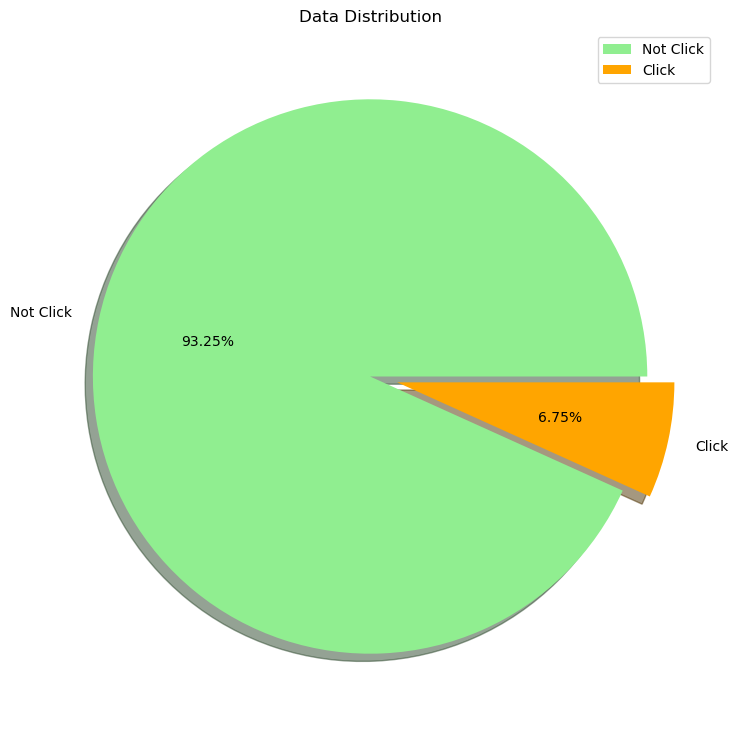

In [22]:
labels = ['Not Click', 'Click'] 
size = df['is_click'].value_counts() 
colors = ['lightgreen', 'orange'] 
explode = [0, 0.1] 
plt.figure(figsize=(9,9)) 
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%') # 饼图参数设置
plt.axis('off') 
plt.title("Data Distribution") 
plt.legend()
plt.show() 

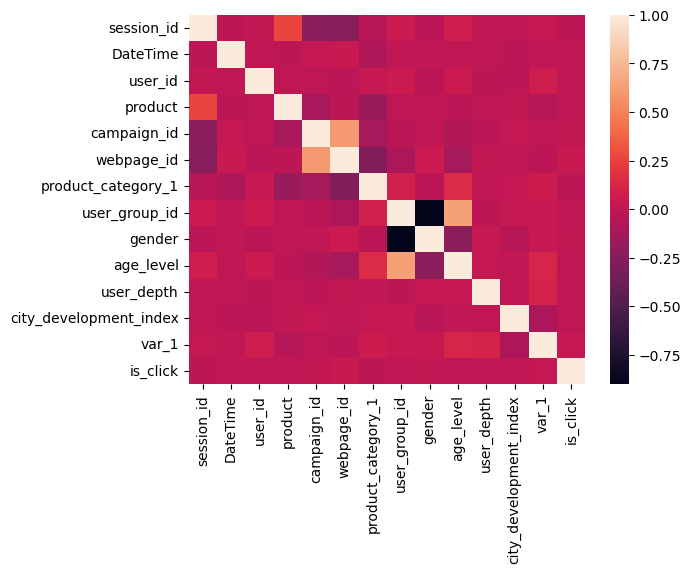

In [23]:
sns.heatmap(df.corr())
plt.show()

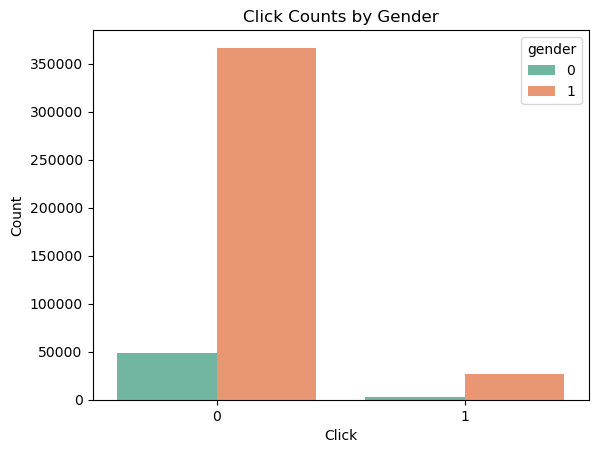

In [24]:
sns.countplot(x='is_click', hue='gender',
              data=df, 
              palette='Set2')

# set the plot title and axis labels
plt.title('Click Counts by Gender')
plt.xlabel('Click')
plt.ylabel('Count')
plt.show()


In [25]:
Male = df[df['gender']==1]
Male
Female = df[df['gender']==0]
print(f"Male click rate:{round(100*sum(Male['is_click']==1)/Male.shape[0],2)}%")
print(f"Female click rate:{round(100*sum(Female['is_click']==1)/Female.shape[0],2)}%")

Male click rate:6.79%
Female click rate:6.44%


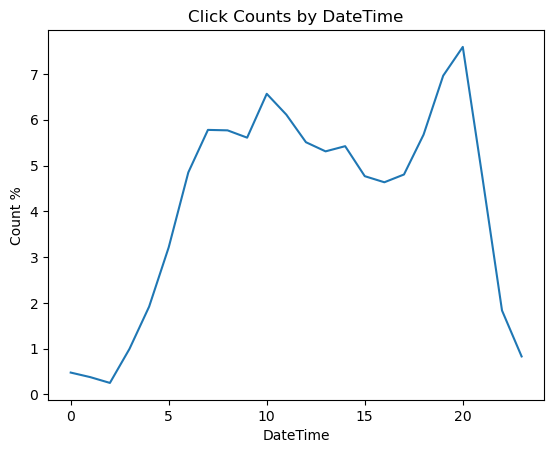

In [26]:
Is_clicked = df[df['is_click']==1]
Is_clicked_hour = Is_clicked.groupby('DateTime').agg('sum').reset_index()
Is_clicked_hour['is_click'] = 100*Is_clicked_hour['is_click']/sum(Is_clicked_hour['is_click'])
Is_clicked_hour

sns.lineplot(x='DateTime',
             y='is_click', 
             data=Is_clicked_hour, 
             palette='Set2')

plt.title('Click Counts by DateTime')
plt.xlabel('DateTime')
plt.ylabel('Count %')

plt.show()


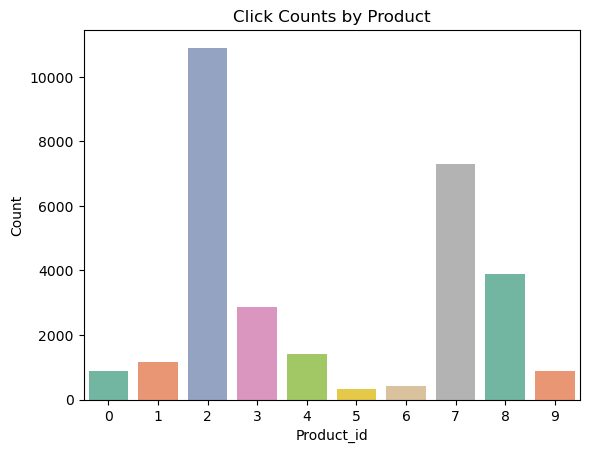

In [27]:
sns.countplot(x='product',data=df[df['is_click'] == 1], palette='Set2')

plt.title('Click Counts by Product')
plt.xlabel('Product_id')
plt.ylabel('Count')

plt.show()

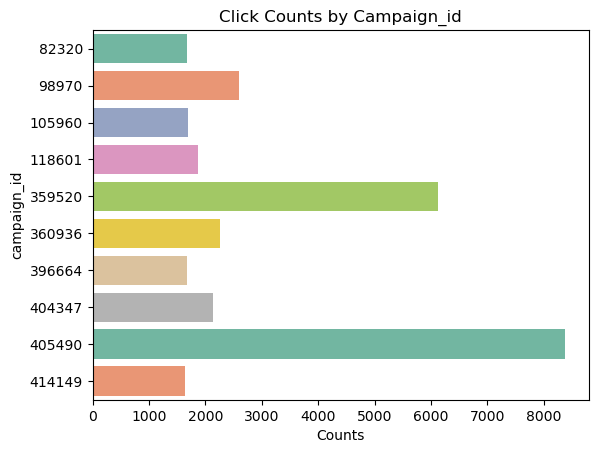

In [28]:
sns.countplot(y='campaign_id',data=df[df['is_click'] == 1], palette='Set2')

plt.title('Click Counts by Campaign_id')
plt.xlabel('Counts')
plt.ylabel('campaign_id')

plt.show()